In [2]:
import sqlite3
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [11]:
# write your code here
conn = sqlite3.connect("../db.sqlite3")
query = """
        SELECT o.id as order_id, o.datetime as order_datetime,
               oi.id as orderitem_id, oi.quantity, oi.product_id,
               p.id as product_id, p.price, p.name as product_name
        FROM restaurant_order AS o
        JOIN restaurant_orderitem AS oi ON o.id = oi.order_id
        JOIN restaurant_product AS p ON oi.product_id = p.id
        """

data = pd.read_sql_query(query, conn)
conn.close()
num_rows = data.shape[0]
print("Number of rows in the DataFrame:", num_rows)
data.to_csv("restaurant_data.csv", index=False)
data_df = pd.read_csv("restaurant_data.csv")
print(data_df.head())

Number of rows in the DataFrame: 74818
   order_id       order_datetime  orderitem_id  quantity  product_id  \
0         1  2019-08-03 20:25:00             1         2           6   
1         1  2019-08-03 20:25:00             2         1         240   
2         1  2019-08-03 20:25:00             3         1          19   
3         1  2019-08-03 20:25:00             4         1          36   
4         1  2019-08-03 20:25:00             5         1         111   

   product_id.1  price         product_name  
0             6   0.80        Plain Papadum  
1           240  12.95     King Prawn Balti  
2            19   2.95          Garlic Naan  
3            36   3.95        Mushroom Rice  
4           111   8.95  Paneer Tikka Masala  


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

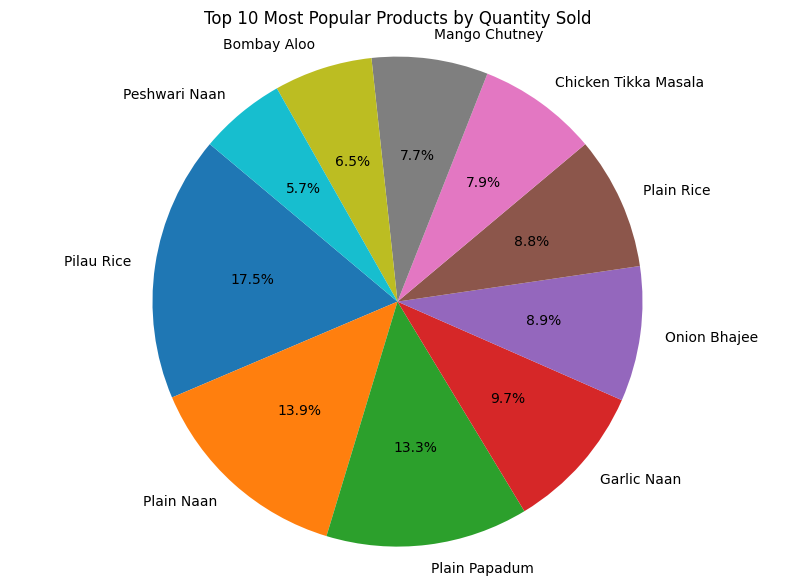

In [12]:
# write your code here
import matplotlib.pyplot as plt

product_sold_counts = data_df["product_name"].value_counts()
top_10_products = product_sold_counts.head(10)
plt.figure(figsize=(10, 7))
plt.pie(top_10_products, labels=top_10_products.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Most Popular Products by Quantity Sold")
plt.axis("equal")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

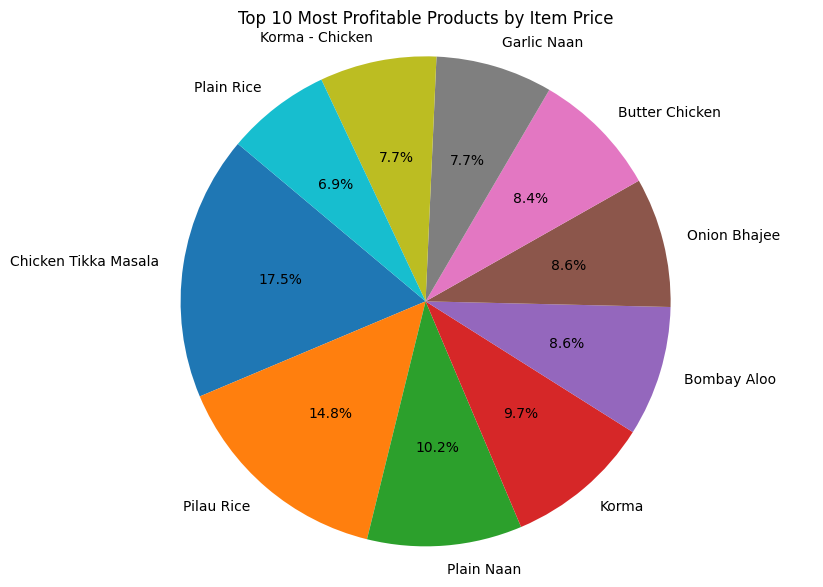

In [13]:
# write your code here
data_df["Item Price"] = data_df["price"] * data_df["quantity"]
top_10_items_by_price = data_df.groupby("product_name")["Item Price"].sum().nlargest(10)

plt.figure(figsize=(10, 7))
plt.pie(top_10_items_by_price, labels=top_10_items_by_price.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Most Profitable Products by Item Price")
plt.axis("equal")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

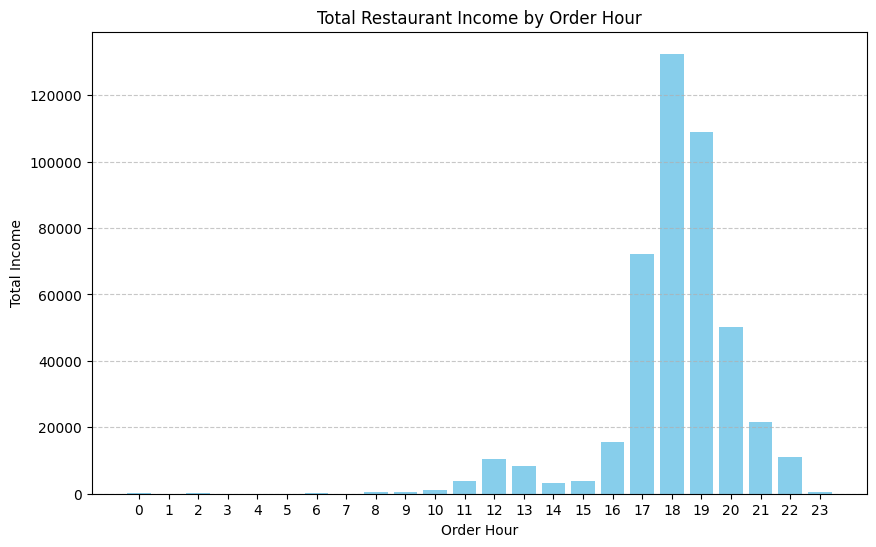

In [15]:
# write your code here
data_df["Order Hour"] = pd.to_datetime(data_df["order_datetime"]).dt.hour
hourly_income = data_df.groupby("Order Hour")["Item Price"].sum()

plt.figure(figsize=(10, 6))
plt.bar(hourly_income.index, hourly_income.values, color='skyblue')
plt.title("Total Restaurant Income by Order Hour")
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.xticks(range(24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

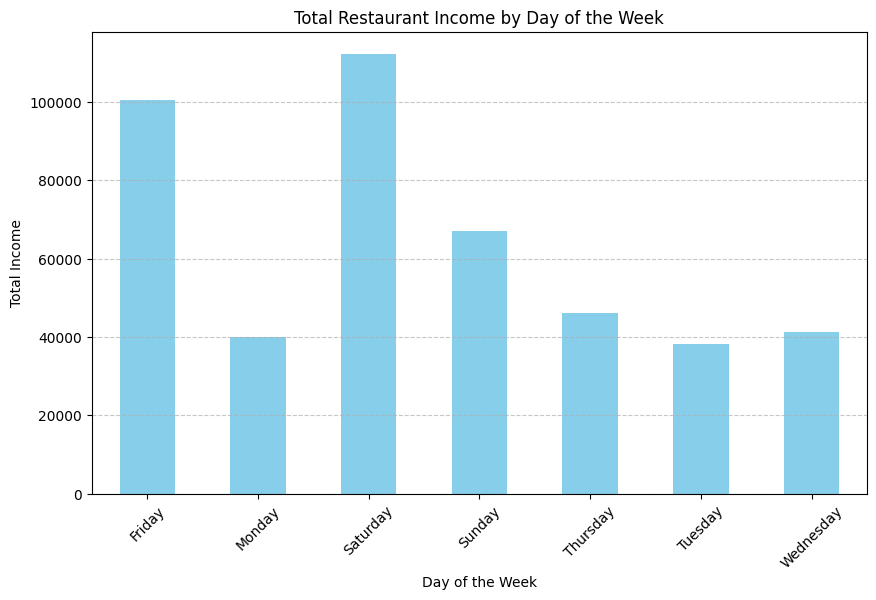

In [16]:
# write your code here
data_df["Order Day Of The Week"] = pd.to_datetime(data_df["order_datetime"]).dt.dayofweek
day_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
data_df["Order Day Of The Week"] = data_df["Order Day Of The Week"].map(day_mapping)
daily_income = data_df.groupby("Order Day Of The Week")["Item Price"].sum()

plt.figure(figsize=(10, 6))
daily_income.plot(kind="bar", color="skyblue")
plt.title("Total Restaurant Income by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Income")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()